In [47]:
import matplotlib.pyplot as plt
from pandas import read_csv 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [48]:
#load dataset
dataset  = read_csv("C:/Users/Raeni/PycharmProjects/Spring2025/DSC630/Dataset/dodgers-2022.csv")

In [49]:
# check dataset if loaded correctly
dataset.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [50]:
# check nulls
dataset.isnull().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

In [51]:
#check correct dtypes
dataset.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

In [52]:
# get summary of Dataset
dataset.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [53]:
# get attendance summaries grouped by month and day of week
temp = dataset[["month","day_of_week","temp"]].groupby(["month","day_of_week"]).mean("temp")
attendance = dataset[["month", "day_of_week", "attend"]].groupby(["month", "day_of_week"]).sum("attend")
df_combined = temp.merge(attendance, on=["month", "day_of_week"])
df_combined

temp  attend
month day_of_week                   
APR   Friday       60.000000   76408
      Monday       60.000000   26376
      Saturday     64.000000  100791
      Sunday       69.500000   87112
      Thursday     57.000000   28328
      Tuesday      65.000000  100014
      Wednesday    61.000000   56074
AUG   Friday       73.666667  120964
      Monday       79.500000   69537
      Saturday     71.500000   86872
      Sunday       82.000000   84402
      Thursday     80.000000   54621
      Tuesday      77.500000  111024
      Wednesday    79.333333  113853
JUL   Friday       76.000000   43873
      Monday       70.000000   99911
      Saturday     75.000000   54014
      Sunday       76.000000   95074
      Tuesday      71.666667  140214
      Wednesday    75.000000   93525
JUN   Friday       69.500000   90195
      Monday       68.000000   50559
      Saturday     73.000000   89427
      Sunday       74.000000   53504
      Thursday     75.000000   49006
      Tuesday      66.000000   55279
      Wednesday    67.000000   43494
MAY   Friday       62.666667  112780
      Monday       69.000000  106041
      Saturday     64.333333  109679
      Sunday       72.333333  126435
      Thursday     70.000000   26773
      Tuesday      73.000000  131013
      Wednesday    70.000000   59502
OCT   Monday       86.000000   33624
      Tuesday      83.000000   42473
      Wednesday    82.000000   34014
SEP   Friday       81.000000   77300
      Monday       84.000000   33540
      Saturday     86.666667  119165
      Sunday       90.000000  102968
      Thursday     80.000000   43309
      Tuesday      78.000000   40619
      Wednesday    77.000000   50560

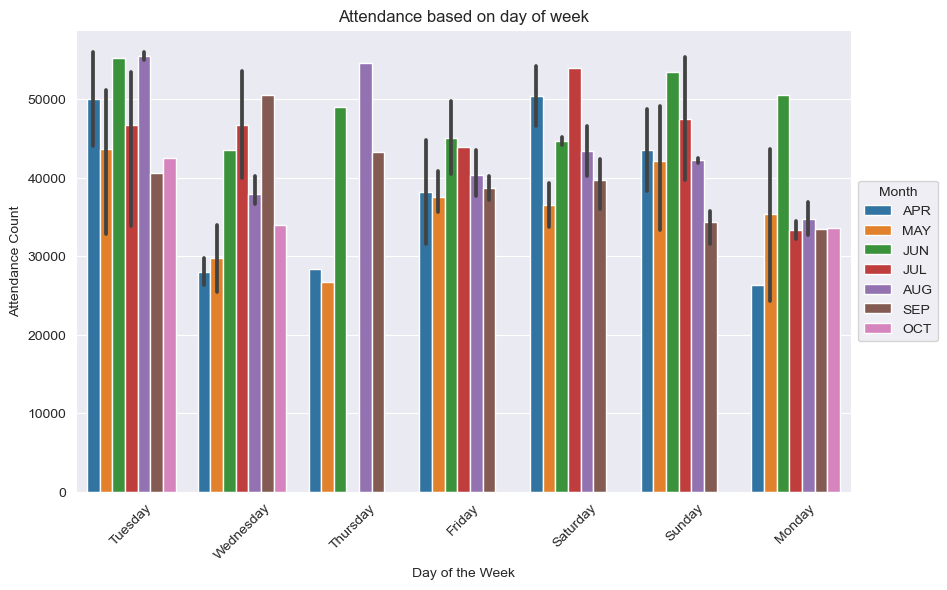

In [54]:
# create bar plots to visualize initial predictions 
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='attend', hue='month', data=dataset)
plt.title("Attendance based on day of week")
plt.xlabel("Day of the Week")
plt.ylabel("Attendance Count")
plt.legend(title="Month", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.show()

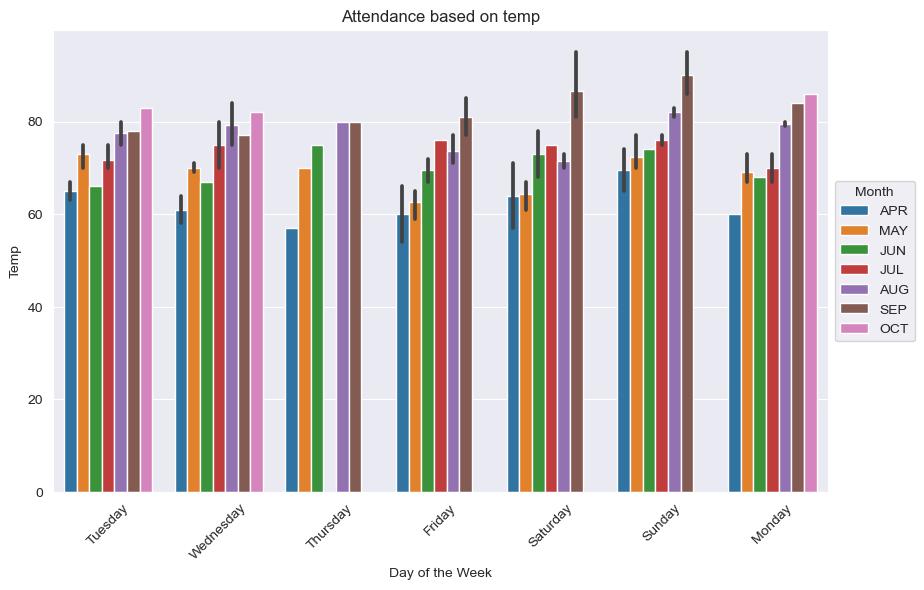

In [55]:
# create bar plots to visualize initial predictions 
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='temp', hue='month', data=dataset)
plt.title("Attendance based on temp")
plt.xlabel("Day of the Week")
plt.ylabel("Temp")
plt.legend(title="Month", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.show()

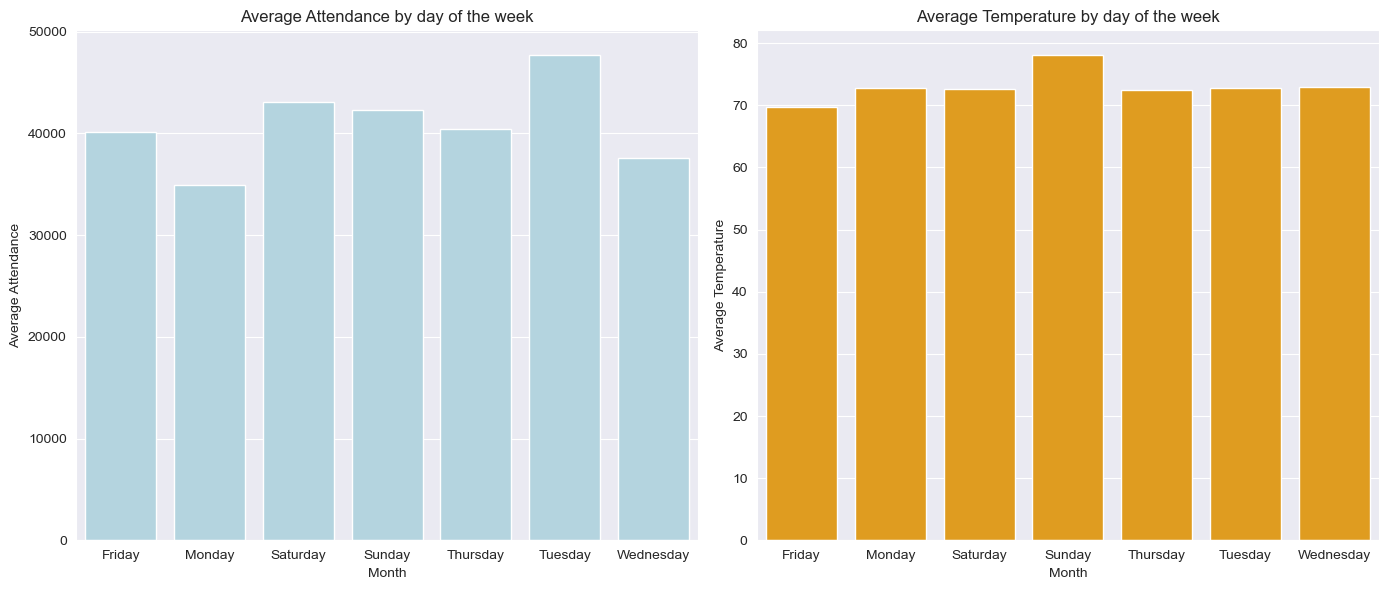

In [57]:
# create dataset for average attendance and temp based on day of the week 
avg_data = dataset.groupby('day_of_week')[['attend', 'temp']].mean().reset_index()
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='day_of_week', y='attend', data=avg_data, ax=ax[0], color='lightblue')
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Average Attendance")
ax[0].set_title("Average Attendance by day of the week")

sns.barplot(x='day_of_week', y='temp', data=avg_data, ax=ax[1], color='orange')
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Average Temperature")
ax[1].set_title("Average Temperature by day of the week")

# Show the plot
plt.tight_layout()  # Adjust spacing between plots
plt.show()


In [64]:
#get coefficients to determine which feature contributes the most to attendance 
df = pd.get_dummies(dataset, columns=['month',
 'day_of_week',
 'opponent',
 'skies',
 'day_night',
 'cap',
 'shirt',
 'fireworks',
 'bobblehead'], drop_first=True)

x = df[['day',
 'temp',
 'month_AUG',
 'month_JUL',
 'month_JUN',
 'month_MAY',
 'month_OCT',
 'month_SEP',
 'day_of_week_Monday',
 'day_of_week_Saturday',
 'day_of_week_Sunday',
 'day_of_week_Thursday',
 'day_of_week_Tuesday',
 'day_of_week_Wednesday',
 'opponent_Astros',
 'opponent_Braves',
 'opponent_Brewers',
 'opponent_Cardinals',
 'opponent_Cubs',
 'opponent_Giants',
 'opponent_Marlins',
 'opponent_Mets',
 'opponent_Nationals',
 'opponent_Padres',
 'opponent_Phillies',
 'opponent_Pirates',
 'opponent_Reds',
 'opponent_Rockies',
 'opponent_Snakes',
 'opponent_White Sox',
 'skies_Cloudy',
 'day_night_Night',
 'cap_YES',
 'shirt_YES',
 'fireworks_YES',
 'bobblehead_YES']]

y = df["attend"]

model = LinearRegression()
model.fit(x, y)

coefficients = model.coef_
feature_names = x.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()

feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance)

                  Feature   Coefficient  Absolute Coefficient
12    day_of_week_Tuesday  26927.672332          26927.672332
16       opponent_Brewers -22827.232386          22827.232386
9    day_of_week_Saturday  21942.456102          21942.456102
14        opponent_Astros -20871.308931          20871.308931
28        opponent_Snakes -20268.767405          20268.767405
34          fireworks_YES  20183.542503          20183.542503
20       opponent_Marlins -19335.738034          19335.738034
10     day_of_week_Sunday  19083.651972          19083.651972
15        opponent_Braves -18977.726425          18977.726425
11   day_of_week_Thursday  18778.959601          18778.959601
13  day_of_week_Wednesday  18266.801884          18266.801884
8      day_of_week_Monday  18253.565455          18253.565455
27       opponent_Rockies -17348.587246          17348.587246
19        opponent_Giants -17278.999097          17278.999097
26          opponent_Reds -16654.399987          16654.399987
24      